## Set the repository path

In [40]:
pyCPT_path = 'C:/Users/Chenying Liu/Desktop/GATECH/courses/CSSM/project/pyCPT-b8f4c04f9cfb8b1f3f434f232deb522569d29f0c/pyCPT-b8f4c04f9cfb8b1f3f434f232deb522569d29f0c'



## Import modules

In [41]:
# Add the repository path into python path
import sys
sys.path.append(pyCPT_path)

# Import modules
import pyCPT
import post_process
import numpy as np
import matplotlib.pyplot as plt
import copy

## Read the NGES dataset
#### Note: 1) Data file should contain 3 columns: ( depth, Fr, Qt ); 2) Data should start from the 1st row (i.e., no table head).

Number of data points:  [296]
Fitting model with number of components =  1
Fitting model with number of components =  2
Fitting model with number of components =  3
Fitting model with number of components =  4
Fitting model with number of components =  5
Fitting model with number of components =  6
Fitting model with number of components =  7
Fitting model with number of components =  8
Fitting model with number of components =  9
Fitting model with number of components =  10


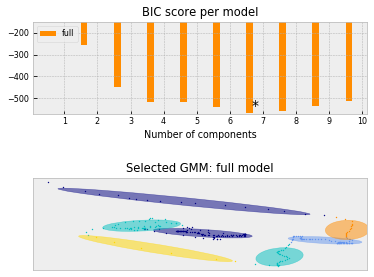

In [50]:
# By default, model selection using BIC is performed after loading the dataset.
datapath = 'C:/Users/Chenying Liu/Desktop/GATECH/courses/CSSM/project/pyCPT-b8f4c04f9cfb8b1f3f434f232deb522569d29f0c/pyCPT-b8f4c04f9cfb8b1f3f434f232deb522569d29f0c/NGES_data.csv'

fig = plt.gcf()
cpt1 = pyCPT.CPT(datapath)


fig.savefig('tessstttyyy.png', dpi=400)

In [51]:
# creat a deep copy of the object cpt1 as cpt2 for later use.
cpt2 = copy.deepcopy(cpt1)

In [52]:
# If explicitly turn off model selection option, no optimal number of cluster will be inferred.
datapath = 'C:/Users/Chenying Liu/Desktop/GATECH/courses/CSSM/project/pyCPT-b8f4c04f9cfb8b1f3f434f232deb522569d29f0c/pyCPT-b8f4c04f9cfb8b1f3f434f232deb522569d29f0c/NGES_data.csv'

cpt3 = pyCPT.CPT(datapath,do_model_selection=False)

Number of data points:  [296]


## Extract soil segments

In [53]:
# Scenario 1: No prior information is available, the proposal function uses the default parameters

cpt1.segmentation(num_of_iter=200, start_iter=150)

Fitting the initial Gaussian mixture model...
Initial GMM fitting is done!


100%|██████████| 200/200 [00:09<00:00, 20.98it/s]


In [54]:
# Scenario 2: No prior information is available, the proposal function uses the user defined parameters. The annealing strategy
# is used during the MCMC sampling process.
# r_anneal = finnal_jump_length / original_jump_length
# anneal_start = the_start_iteration_number_of_annealing / total_number_of_iteration
# anneal_end = the_end_iteration_number_of_annealing / total_number_of_iteration

cpt2.segmentation(num_of_iter=200, start_iter=150,
                  mu_jump_length=0.1,
                  theta_jump_length=0.1, 
                  cov_volume_jump_length=0.1,
                  r_anneal=0.1, anneal_start=0.5, anneal_end=0.75)

Fitting the initial Gaussian mixture model...
Initial GMM fitting is done!


100%|██████████| 200/200 [00:09<00:00, 21.06it/s]


In [55]:
# Scenario 3: If prior information is available:
# prior_mus : prior knowledge of the center of each cluster
# prior_mu_cov : define the variability of the conter, each center corresponds to a value. (big: uncertain, small: certain)
# prior_covs: prior knowledge of the covariance matrix of each cluster

prior_mus = np.array([[0.3, 1.8],
                      [0.47575528, 1.59408055],
                      [0.2, 2.5],
                      [0.63169082, 1.03545094],
                      [0.78032598, 1.6645969 ],
                      [0.72301104, 1.44057298],
                      [0.36804063, 1.23878841]])

prior_mu_cov = [100,10,100,10,10,10,10]

prior_covs = np.array([[[0.1, 0],
                        [0, 0.1]],

                       [[0.1, 0],
                        [0, 0.1]],

                       [[0.1, 0],
                        [0, 0.1]],

                       [[0.1, 0],
                        [0, 0.1]],

                       [[0.1, 0],
                        [0, 0.1]],

                       [[0.1, 0],
                        [0, 0.1]],

                       [[0.1, 0],
                        [0,  0.1]]])

cpt3.segmentation(num_of_iter=200, start_iter=150, 
                  prior_mus=prior_mus, 
                  prior_mu_cov=prior_mu_cov,
                  prior_covs=prior_covs, 
                  mu_jump_length=0.1,
                  theta_jump_length=0.1, 
                  cov_volume_jump_length=0.1,
                  r_anneal=0.1, anneal_start=0.5, anneal_end=0.75)

100%|██████████| 200/200 [00:09<00:00, 20.98it/s]


## Soil interpretation

In [59]:
cpt1.detect_layers()
cpt2.detect_layers()
cpt3.detect_layers()

## Visualization

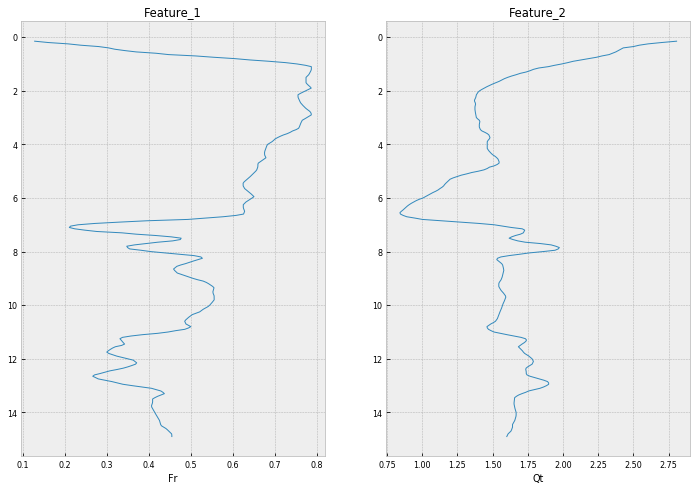

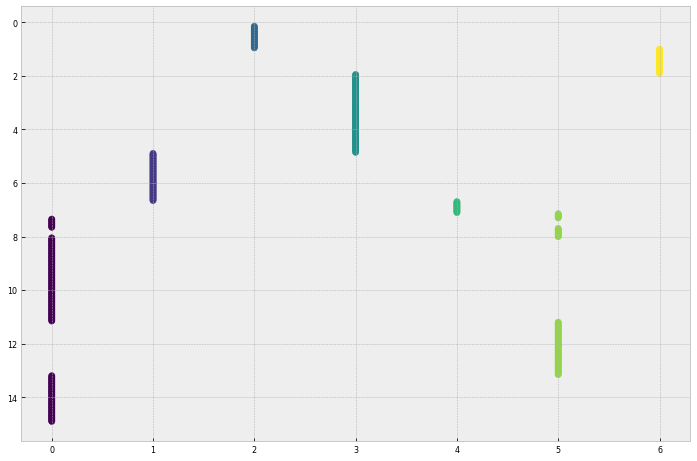

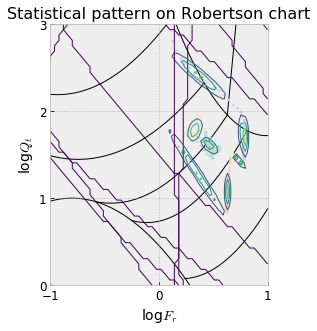

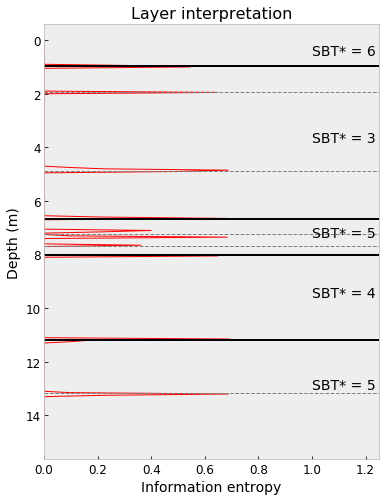

<Figure size 432x288 with 0 Axes>

In [64]:
post_process.plot_feature(cpt1.element,xlabel=['Fr','Qt'], scatter=False) # show the CPT data
post_process.plot_image(cpt1.element, cpt1.element.label_map_est) # show the spatial pattern
pyCPT.mixture_plot_robertson_chart(cpt1, aspect=0.8) # show the statistical pattern

pyCPT.plot_layers(cpt1) # show the soil layers
fig = plt.gcf()
fig.savefig('tes2.png', dpi=400)

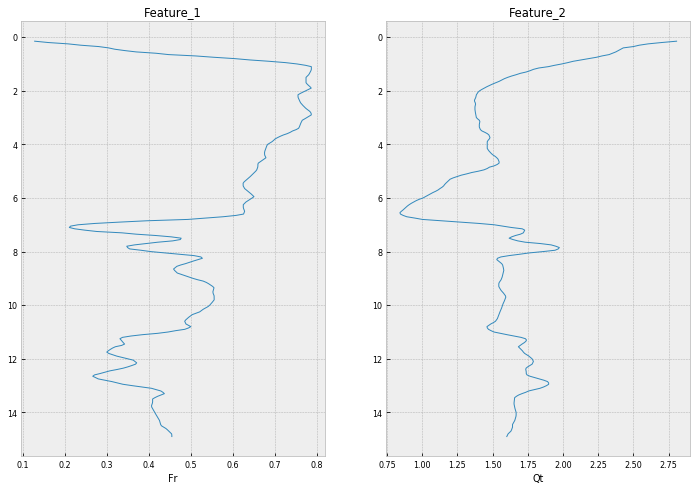

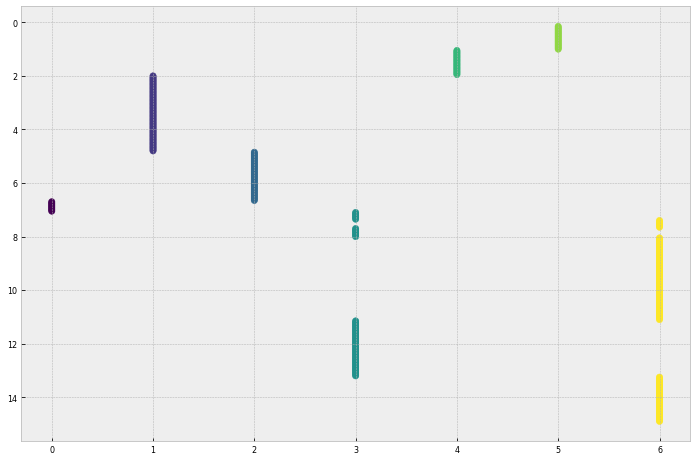

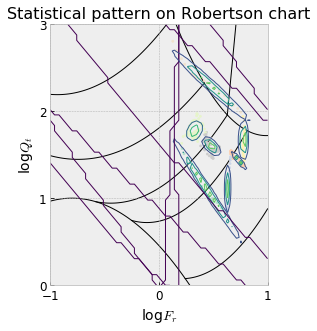

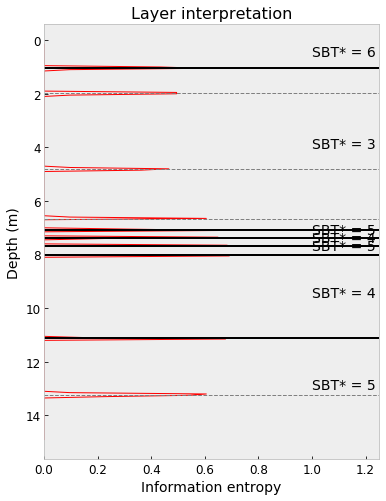

<Figure size 432x288 with 0 Axes>

In [65]:
post_process.plot_feature(cpt2.element,xlabel=['Fr','Qt'], scatter=False) # show the CPT data
post_process.plot_image(cpt2.element, cpt2.element.label_map_est) # show the spatial pattern
pyCPT.mixture_plot_robertson_chart(cpt2, aspect=0.8) # show the statistical pattern

pyCPT.plot_layers(cpt2) # show the soil layers
fig = plt.gcf()
fig.savefig('tes3.png', dpi=400)

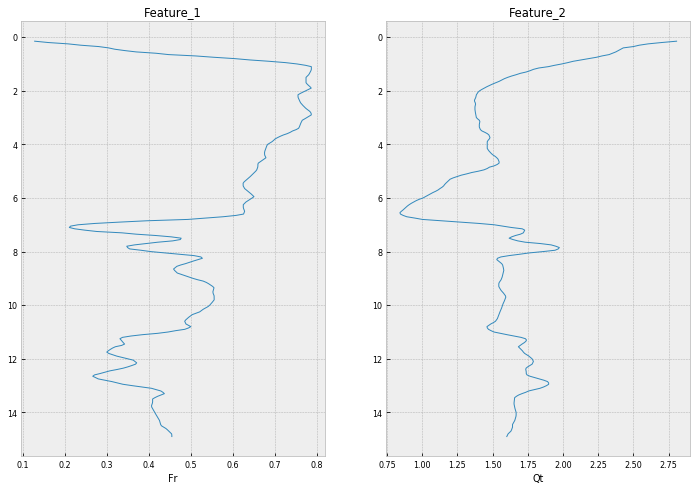

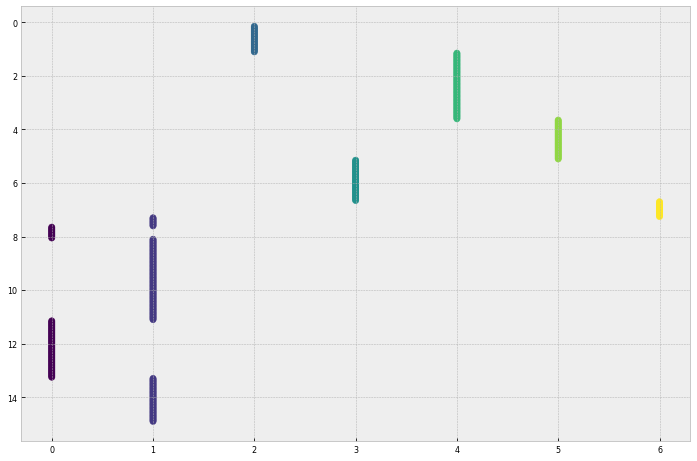

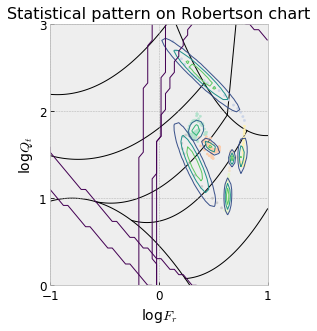

<Figure size 432x288 with 0 Axes>

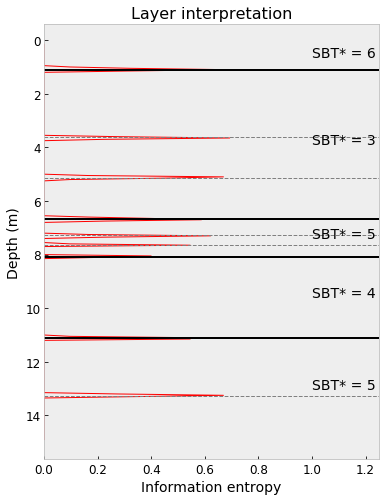

In [66]:
post_process.plot_feature(cpt3.element,xlabel=['Fr','Qt'], scatter=False) # show the CPT data
post_process.plot_image(cpt3.element, cpt3.element.label_map_est) # show the spatial pattern
pyCPT.mixture_plot_robertson_chart(cpt3, aspect=0.8) # show the statistical pattern
fig = plt.gcf()
pyCPT.plot_layers(cpt3) # show the soil layers
fig.savefig('tes4.png', dpi=400)

#### Identified issue: When you test the repository by using the on-line interactive binder version, some noise contour lines could show up in the contour plot on the Roberson chart. This is an identified issue and probabily related to the version of the package "matplotlib" in MyBinder.org. The colone version from the github repository does not have such behavior.

In [ ]:
# Diagnose plots
num_of_iteration = len(cpt3.element.mus)

plt.figure
for k in range(7):
    plt.plot([cpt3.element.mus[i][k,0] for i in range(num_of_iteration)], label=('C '+ str(k)))

plt.xlim(1,num_of_iteration)
plt.legend()
plt.ylabel('mu_Fr')
plt.xlabel('Iteration')
plt.show()

plt.figure
for k in range(7):
    plt.plot([cpt3.element.covs[i][k,0,0] for i in range(num_of_iteration)])

plt.xlim(1,num_of_iteration)
plt.ylabel('cov_00')
plt.xlabel('Iteration')
plt.show()